In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
total_df = pd.read_csv('data/pda.csv')

ids = total_df['pid_ri'].unique()
ids.sort()

df_by_ids = dict()

for id in ids:
    item = total_df[total_df['pid_ri'] == id]
    item = item.set_index('DAY')
    item = item.interpolate(limit_direction='both')
    
    na_count = item.isna().sum().sum()

    if na_count == 0:
        df_by_ids[id] = item

print(len(df_by_ids))

dim = df_by_ids[1].shape[1] - 3

407


In [27]:
min_val = np.empty(dim)
max_val = np.empty(dim)

for i in range(dim):
    feature = total_df.iloc[:, 3+i]
    min_val[i] = feature.min()
    max_val[i] = feature.max()

min_val

array([ 0.00000000e+00,  2.30000000e+01,  3.80000000e+02,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.50000000e+00,
        9.40000000e+00,  9.00000000e+00,  5.60000000e+00, -2.60000000e+01,
        7.11300000e+00,  2.19000000e+01,  2.20000000e+01,  1.23000000e+01,
       -1.70000000e+01,  6.79450000e+00,  2.19000000e+01,  2.20000000e+01,
        1.20000000e+01, -2.30000000e+01,  6.86025000e+00,  2.19000000e+01,
        2.20000000e+01,  1.23000000e+01, -1.74705882e+01,  6.71975000e+00,
        2.01500000e+01,  1.72500000e+01,  1.02500000e+01, -2.30000000e+01,
        6.93500000e+00,  2.19000000e+01,  2.20000000e+01,  1.23000000e+01,
       -1.70000000e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [28]:
x = []
y = []

zero_length = []
one_length = []

max_length = 15

for id in df_by_ids:
    df = df_by_ids[id]

    data = df.iloc[:15, 3:].to_numpy()

    data = (data - min_val) / (max_val - min_val) + 1

    size = data.shape[0]

    for i in range(1, size+1):
        padded_data = np.zeros((max_length, dim))

        for j in range(i):
            padded_data[max_length - i + j] = data[j]

        y.append(df['PDA'].iloc[0])
        x.append(padded_data)

        if y[-1] == 0:
            zero_length.append(i)
        else:
            one_length.append(i)

y = np.array(y)
x = np.array(x)

print(y.shape)
print(x.shape)

print(x)

(4723,)
(4723, 15, 99)
[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [1.         1.5        1.98198198 ... 1.06609368 1.10349666 1.09113899]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [1.         1.5        1.98198198 ... 1.06609368 1.10349666 1.09113899]
  [1.         1.5        1.98198198 ... 1.03405201 1.09358251 1.08035161]]

 [[0.         0.         0.         ... 0.         0.         0.        ]

In [29]:
print(len(y[y==1]))
a = len(y[y==1]) 
b = len(y)
print(a/b)

568
0.12026254499258945


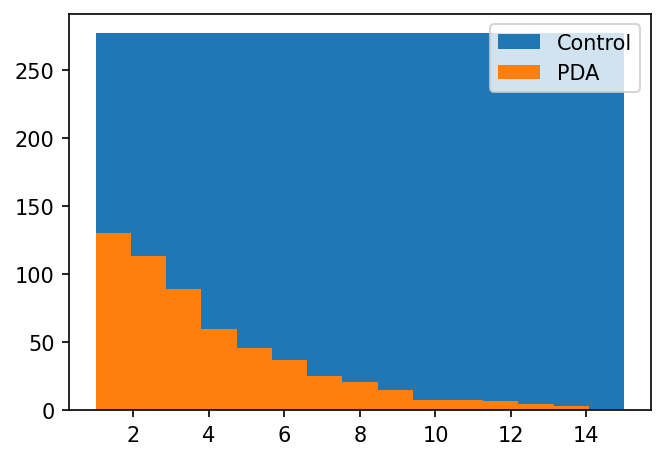

In [30]:
plt.figure(figsize=(5, 3.5), dpi=150)

plt.hist(zero_length, bins=15, label='Control')
plt.hist(one_length, bins=15, label='PDA')

plt.legend()

plt.show()

In [31]:
np.save('data/y.npy', y)
np.save('data/x.npy', x)